## P- Median Location Problem


### Import Packages

In [16]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import copy

### Inputs - Instance 1

In [2]:
# #Generate Data Inputs

# # Select random seed
# random.seed(1)

# # Number of candidate locations
# n=100

# #Number of locations to open
# openfac=15

# #Coordinate Range
# rangelct=100000

# #Generate random locations
# coordlct_x = random.choices(range(0, rangelct), k=n)
# coordlct_y = random.choices(range(0, rangelct), k=n)

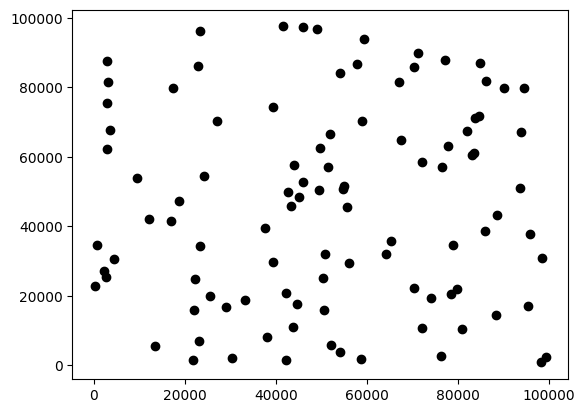

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Inputs - Instance 2

In [37]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

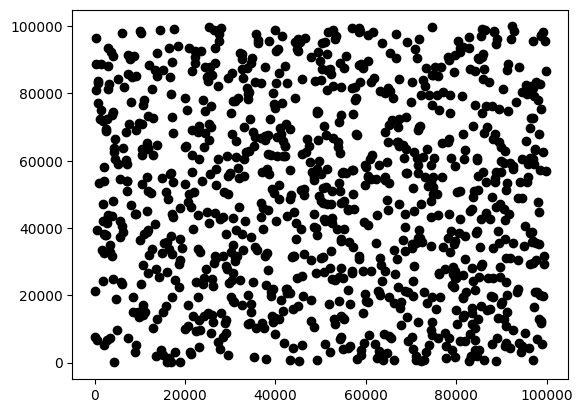

In [38]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Outputs

#### Random Sample

In [39]:
#Setting up initial solution
random.seed(1)
###This is incorrectly introducing k new facilities
#fac_coordlct_x = random.choices(range(0, rangelct), k=openfac)
#fac_coordlct_y = random.choices(range(0, rangelct), k=openfac)

#choosing k facilities from the already generated
indices = random.sample(range(n), openfac)
indices.sort(reverse=True)
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()

fac_coordlct_x, fac_coordlct_y = [], []
for index in indices:
    fac_coordlct_x.append(removedX.pop(index))
    fac_coordlct_y.append(removedY.pop(index))


9721066.803413063


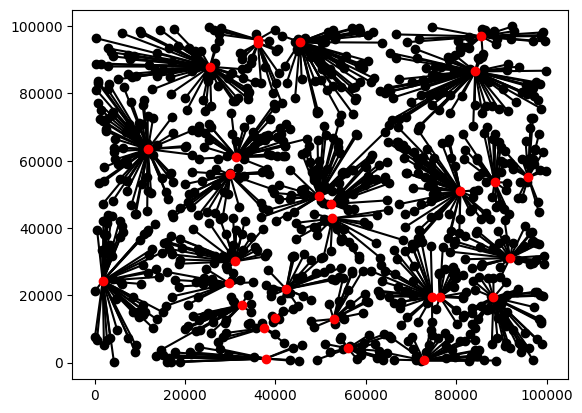

In [40]:
def connectpoints(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],'k-')

#for i_index in range(len(linkindex_p2)): 
   # connectpoints(coordlct_x,coordlct_y,fac_coordlct_x[i_index],fac_coordlct_y[i_index])

def distance (x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def plot_min_dist(x, y, kx, ky):
    obj = 0
    for idx in range(n - openfac):
        min = 0
        chosenK = 0
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min or min == 0:
                min = currentDist
                chosenK = idx_k
        connectpoints(x[idx], y[idx], kx[chosenK], ky[chosenK])
        obj += min
    return obj

def calc_min_dist(x, y, kx, ky):
    obj = 0
    for idx in range(n - openfac):
        min = 0
        chosenK = 0
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min or min == 0:
                min = currentDist
                chosenK = idx_k
        #connectpoints(x[idx], y[idx], kx[chosenK], ky[chosenK])
        obj += min
    return obj

ObjValue = plot_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');
print(ObjValue)

In [41]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 




while cputime_i[-1]<150:
    
    iteration=iteration+1
    
    #Random permutation
    indices = random.sample(range(n), openfac)
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()

    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
    
    #Compute Objective Value
    ObjValue= calc_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(indices)
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
    
    #Code for Updating Plot
    # plt.plot(removedX, removedY, 'o', color='black');
    # plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');

    # plt.draw()
    # plt.pause(0.1)
    # plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

9721066.803413063
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8809409.315584553
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.152380215
8297355.15

7814422.82368551


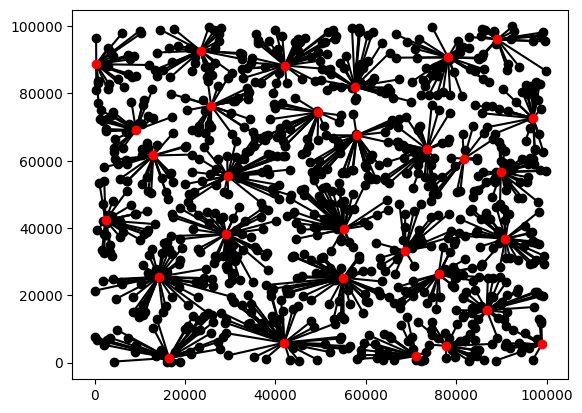

In [42]:

removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)
plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
print(ObjValueOpt)


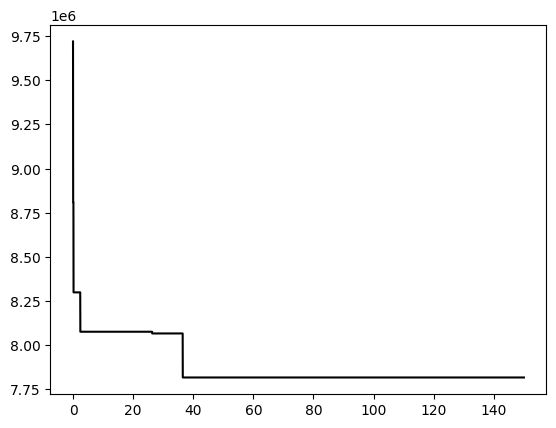

In [43]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')